In [1]:
# ARIMA used for short term forecast

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import pandas as pd
import pytz

import pyflux as pf
from pandas.plotting import autocorrelation_plot
from datetime import datetime, timedelta

import modules.dataframe_manip as dp

In [56]:
# CHANGABLE VARIABLES
filename = 'wifi_data_until_20190204.csv'
building_name = 'ALEXANDER' # use ALL for all buildings

# CONST VARIABLES
building_list = [
    ' POMONA','118-8TH','1567TH','345C','ALEXANDER','ANDREW','BALDWIN',
    'BRACKETT','BRIDGES','CARNEGIE','CLARK3','CLARKI','CLARKV',
    'CROOKSHANK','DRAPER', 'FARM', 'FRANK', 'FRARY', 'GIBONEY',
    'GIBSON', 'GROUNDS', 'HAHN', 'HALDEMAN','HARWOOD','ITB',
    'KENYON', 'LAWRY', 'LEB', 'LEBUS', 'MASON', 'MCCARTHY', 'MERRIT',
    'MILLIKAN', 'MUSEUM', 'NORTON', 'OLDENBORG','PAULEY','PEARSON',
    'PENDLETON','POMONA','RAINS','REMBRANDT', 'SCC', 'SEAVER','SGM',
    'SMILEY','SMITH','SONTAG','STUDIOART','SUMNER','THATCHER','WALKER',
    'WALTON','WIG']

In [57]:
data = dp.csv_to_timeseries_df(
    filepath=filename,
    timezone=pytz.timezone('US/Pacific'))

In [58]:
building = data[dp.get_building_accesspoints(data, building_name)].copy()
building.index = building.index
building['y'] = building.sum(axis=1)
building = building.resample('D').mean()

In [59]:
new_df = pd.DataFrame()
new_df['average_connected_devices'] = building['y']
new_df.index = building.index

In [60]:
model = pf.ARIMA(data=new_df, ar=4, ma=4, target='average_connected_devices', family=pf.Normal())

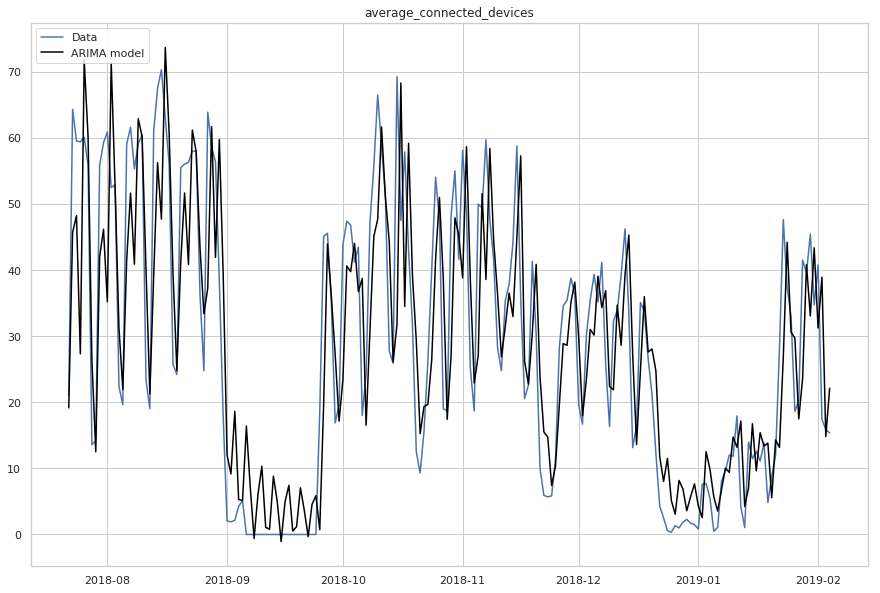

In [61]:
x = model.fit("MLE")
model.plot_fit(figsize=(15,10))

DatetimeIndex(['2018-07-18 00:00:00-07:00', '2018-07-19 00:00:00-07:00',
               '2018-07-20 00:00:00-07:00', '2018-07-21 00:00:00-07:00',
               '2018-07-22 00:00:00-07:00', '2018-07-23 00:00:00-07:00',
               '2018-07-24 00:00:00-07:00', '2018-07-25 00:00:00-07:00',
               '2018-07-26 00:00:00-07:00', '2018-07-27 00:00:00-07:00',
               ...
               '2019-01-26 00:00:00-08:00', '2019-01-27 00:00:00-08:00',
               '2019-01-28 00:00:00-08:00', '2019-01-29 00:00:00-08:00',
               '2019-01-30 00:00:00-08:00', '2019-01-31 00:00:00-08:00',
               '2019-02-01 00:00:00-08:00', '2019-02-02 00:00:00-08:00',
               '2019-02-03 00:00:00-08:00', '2019-02-04 00:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', name='time', length=202, freq='D')
